In [1]:
import pandas as pd
from prophet import Prophet
import seaborn as sns
import numpy as np
import streamlit as st
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('count_model.xlsx', index_col=[0], parse_dates=[0])
st.title('Predictions for number of items needing to be picked by IDC using the Facebook Prophet Model')
st.write('Ibrahim Quaizar')
st.write('August 13th, 2024')

In [3]:
df.head()

,pick_lines
demand_date,
2022-01-01,294
2022-01-02,3741
2022-01-03,11107
2022-01-04,11139
2022-01-05,9637


In [4]:
train_size = int(len(df)*0.7)
train_data, test_data = df[0:train_size],df[train_size:len(df)]
train_data_proph = train_data.reset_index().rename(columns = {'demand_date':'ds', 'pick_lines':'y'})
test_data_proph = test_data.reset_index().rename(columns = {'demand_date':'ds','pick_lines':'y'})
test_data_proph.head()

,ds,y
0,2023-10-21,856
1,2023-10-22,3637
2,2023-10-23,14725
3,2023-10-24,14223
4,2023-10-25,13573


In [5]:
mod = Prophet()
mod.add_country_holidays(country_name= 'US')
mod.fit(train_data_proph)
y_pred = mod.predict(test_data_proph)
print(y_pred.head())

12:19:54 - cmdstanpy - INFO - Chain [1] start processing
12:19:54 - cmdstanpy - INFO - Chain [1] done processing


          ds         trend    yhat_lower    yhat_upper   trend_lower  \
0 2023-10-21  10589.450374   1031.970503   3472.380169  10589.450374   
1 2023-10-22  10595.190810   3279.196849   5691.435363  10595.190810   
2 2023-10-23  10600.931245  12728.803901  15142.468686  10600.931245   
3 2023-10-24  10606.671680  12489.190122  15007.348102  10606.671680   
4 2023-10-25  10612.412115  11227.897484  13637.790729  10612.412115   

    trend_upper  Christmas Day  Christmas Day_lower  Christmas Day_upper  \
0  10589.450374            0.0                  0.0                  0.0   
1  10595.190810            0.0                  0.0                  0.0   
2  10600.931245            0.0                  0.0                  0.0   
3  10606.671680            0.0                  0.0                  0.0   
4  10612.414954            0.0                  0.0                  0.0   

   Christmas Day (observed)  ...  holidays  holidays_lower  holidays_upper  \
0                       0.0  ...

In [6]:
revTable = y_pred[['ds','yhat','yhat_lower','yhat_upper']]
revTable = pd.merge(test_data_proph,revTable, on = 'ds')
revTable.head()

,ds,y,yhat,yhat_lower,yhat_upper
0,2023-10-21,856,2221.502695,1031.970503,3472.380169
1,2023-10-22,3637,4478.506906,3279.196849,5691.435363
2,2023-10-23,14725,13947.501401,12728.803901,15142.468686
3,2023-10-24,14223,13694.546996,12489.190122,15007.348102
4,2023-10-25,13573,12386.247626,11227.897484,13637.790729


In [7]:
revTable = revTable.rename(columns = {'ds':'Date', 'y':'actual_pick_lines', 'yhat':'predicted_pick_lines',
                                      'yhat_lower':'lower_bound','yhat_upper':'upper_bound'})
revTable.head()

,Date,actual_pick_lines,predicted_pick_lines,lower_bound,upper_bound
0,2023-10-21,856,2221.502695,1031.970503,3472.380169
1,2023-10-22,3637,4478.506906,3279.196849,5691.435363
2,2023-10-23,14725,13947.501401,12728.803901,15142.468686
3,2023-10-24,14223,13694.546996,12489.190122,15007.348102
4,2023-10-25,13573,12386.247626,11227.897484,13637.790729


In [8]:
rangee = []
for index, row in revTable.iterrows():
    if row['actual_pick_lines'] >= row['lower_bound'] and row['actual_pick_lines'] <= row['upper_bound']:
        rangee.append('within_range')
    elif  row['actual_pick_lines'] > row['upper_bound']:
        rangee.append('over_range')
    elif row['actual_pick_lines'] < row['lower_bound']:
        rangee.append('under_range')
revTable['Range_Status'] = rangee
print(revTable.head())

        Date  actual_pick_lines  predicted_pick_lines   lower_bound  \
0 2023-10-21                856           2221.502695   1031.970503   
1 2023-10-22               3637           4478.506906   3279.196849   
2 2023-10-23              14725          13947.501401  12728.803901   
3 2023-10-24              14223          13694.546996  12489.190122   
4 2023-10-25              13573          12386.247626  11227.897484   

    upper_bound  Range_Status  
0   3472.380169   under_range  
1   5691.435363  within_range  
2  15142.468686  within_range  
3  15007.348102  within_range  
4  13637.790729  within_range  


C:\Users\IQuaizar\AppData\Local\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\IQuaizar\AppData\Local\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


Text(0.5, 1.0, 'Training & Testing Data')

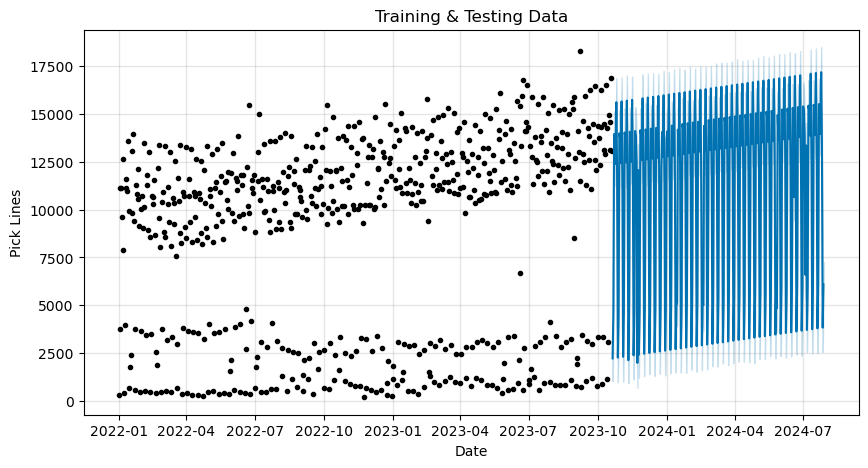

In [17]:
fig, ax = plt.subplots(figsize = (10,5))
fig1 = mod.plot(y_pred,ax=ax, xlabel = 'Date',ylabel = 'Pick Lines')
plt.title(label = 'Training & Testing Data')

C:\Users\IQuaizar\AppData\Local\anaconda3\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()


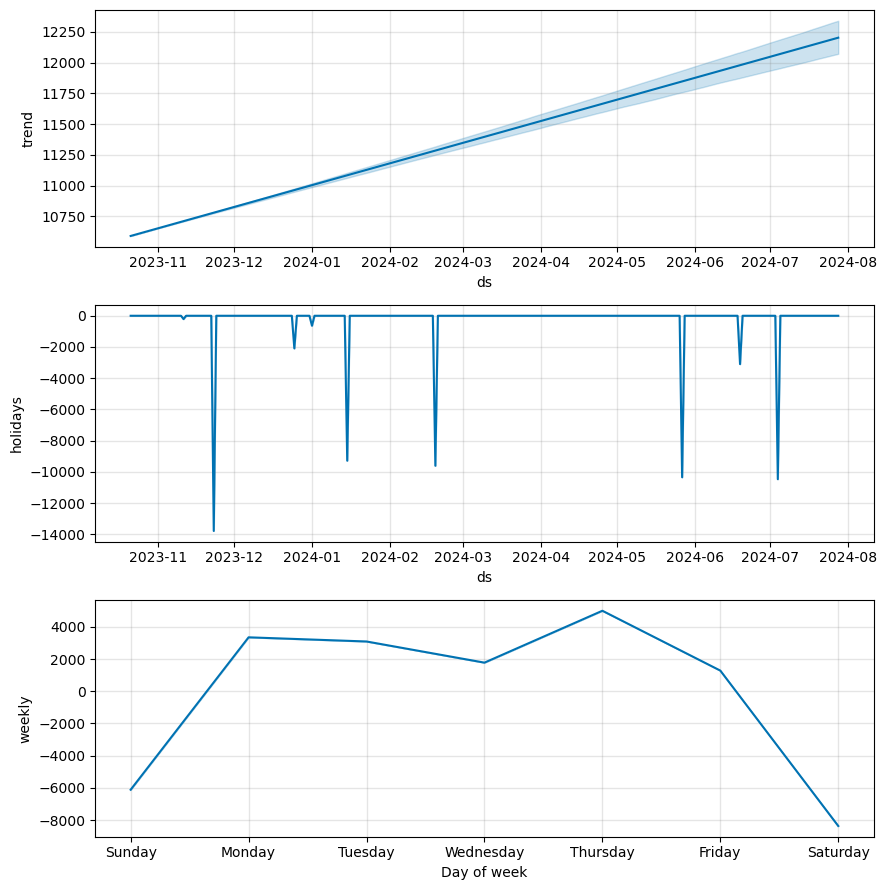

In [18]:
fig2 = mod.plot_components(y_pred)

C:\Users\IQuaizar\AppData\Local\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\IQuaizar\AppData\Local\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


(19651.0, 19932.0)

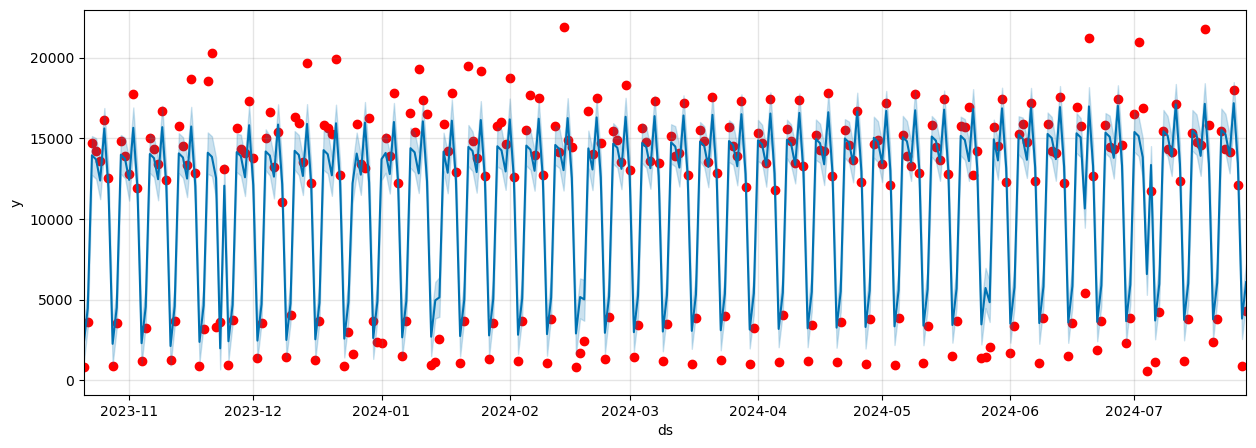

In [19]:
f,ax = plt.subplots(figsize = (15,5))
ax.scatter(test_data.index,test_data['pick_lines'],color = 'r')
fig3 = mod.plot(y_pred,ax=ax)
plt.xlim(pd.to_datetime('2023-10-21'),pd.to_datetime('2024-07-28'))

In [39]:
range_count = revTable['Range_Status'].value_counts()
bp = plt.figure(figsize = (10,5))
sns.barplot(x = range_count.index, y= range_count.values, alpha = 0.8, color = 'purple')
plt.title(label = 'Range Status Count')
plt.xlabel('Range Status')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

In [21]:
#Future Predictions
future = mod.make_future_dataframe(periods = 800, freq = 'd', include_history = False)
future_fcst = mod.predict(future)
future_fcst.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas Day,Christmas Day_lower,Christmas Day_upper,Christmas Day (observed),...,holidays,holidays_lower,holidays_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
795,2025-12-24,15153.096398,15521.239252,18327.246586,14514.575457,15834.044000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,1773.835511,1773.835511,1773.835511,0.0,0.0,0.0,16926.931909
796,2025-12-25,15158.836833,16765.860071,19403.070573,14519.599756,15841.148151,-2092.484384,-2092.484384,-2092.484384,0.0,...,-2092.484384,-2092.484384,-2092.484384,4996.127511,4996.127511,4996.127511,0.0,0.0,0.0,18062.479960
797,2025-12-26,15164.577268,15065.860846,17987.458819,14523.472831,15848.085488,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,1280.223088,1280.223088,1280.223088,0.0,0.0,0.0,16444.800356
798,2025-12-27,15170.317703,5438.909299,8115.444265,14527.119816,15855.060236,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,-8367.947679,-8367.947679,-8367.947679,0.0,0.0,0.0,6802.370024
799,2025-12-28,15176.058139,7724.012522,10442.760103,14530.766801,15862.079246,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,-6116.683904,-6116.683904,-6116.683904,0.0,0.0,0.0,9059.374235


Text(65.34722222222221, 0.5, 'Pick Lines')

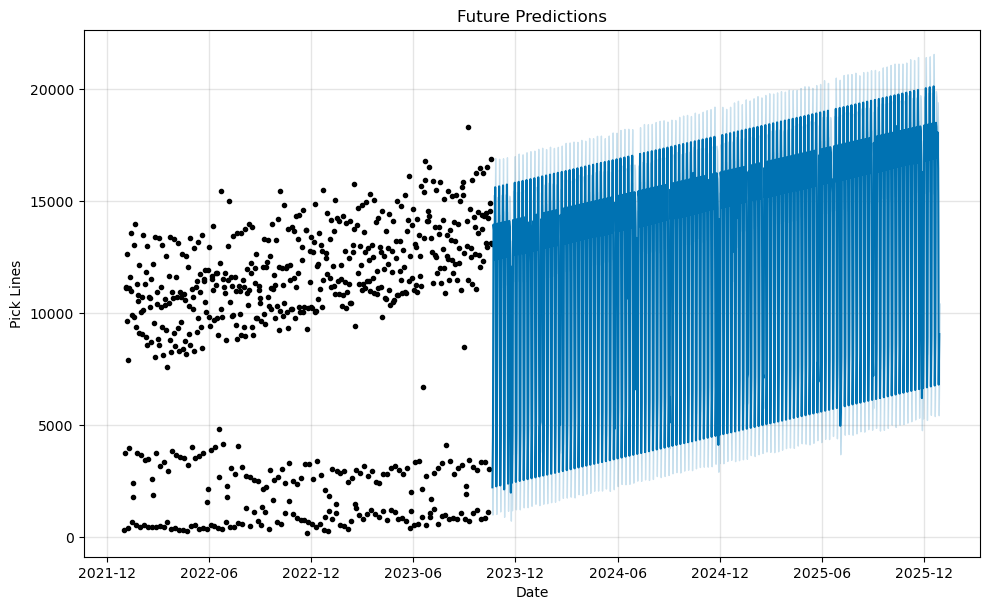

In [25]:
fig4 = mod.plot(future_fcst)
plt.title('Future Predictions')
plt.xlabel('Date')
plt.ylabel('Pick Lines')

C:\Users\IQuaizar\AppData\Local\anaconda3\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()


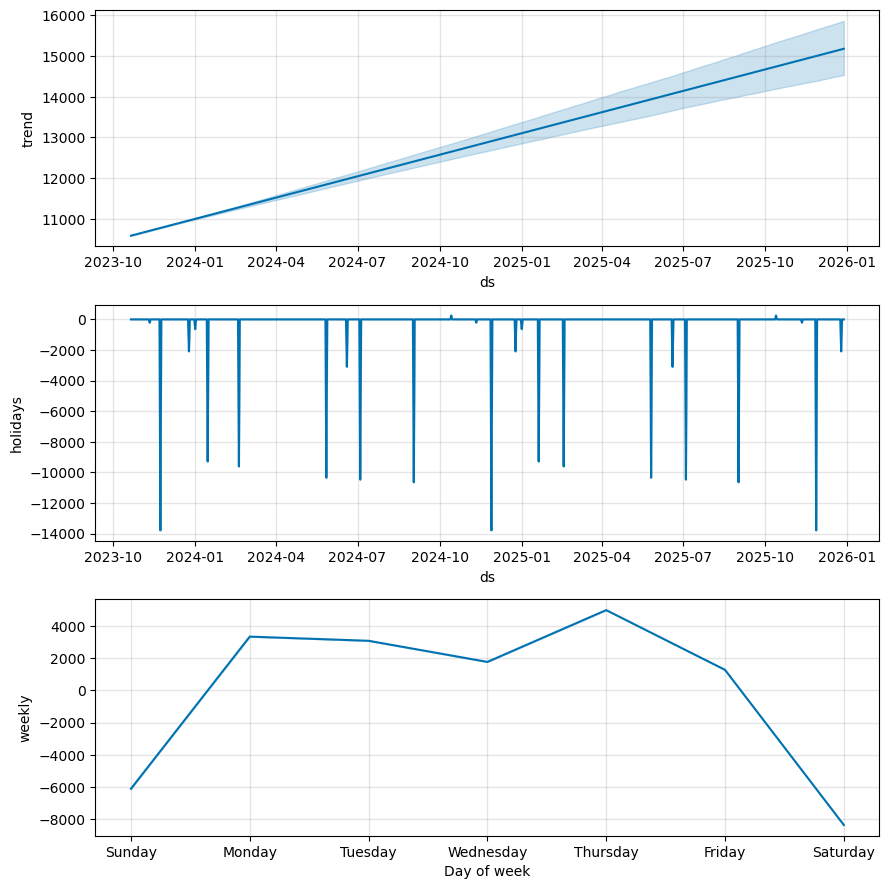

In [45]:
fig5 = mod.plot_components(future_fcst)
fig5

In [56]:
fig6 = mod.plot(future_fcst)
plt.xlim(pd.to_datetime('2024-08-15'),pd.to_datetime('2025-12-01'))
plt.title('Future Data Points')
plt.xlabel('Dates')
plt.ylabel('Pick Lines')

Text(65.34722222222221, 0.5, 'Pick Lines')

In [57]:
st.header('Table visualization')
st.write('''Table showing predicted and actual pick lines, along with a lower and upper bound. Last column
         shows an analysis if the actual pick lines are within the upper and lower bounds or not. This helps
         with figuring out how our model worked, or some workarounds we may need to take into consideration
         when trusting these predictions.''')
st.dataframe(revTable)


DeltaGenerator()

In [49]:
st.header('Model Visualization through graphs')
st.write('''Graph showing testing and training data done with the model to achieve prediction results. 
         Upper and Lower bound shades shown. As indicated, the model does predict the training data
         well, with a few outliers stemming from unforseen events.''')
st.pyplot(fig1)


DeltaGenerator()

In [50]:
st.write('''Components of the above graph, showing the overall trend, weekly tend, and trends near the holidays.
         From the overall trend, we can gather that the model is fitting to an upwards trend, which becomes
         important when predicting future years. As for the days of the week, We can see that no production
         happens on weekends, and that production tends to be highest on Thursdays.''')
st.pyplot(fig2)

DeltaGenerator()

In [51]:
st.write('''Zoomed in graph to show just the predicted quantities. Date Range: 10/21/2023 - 07/28/2024.
         Here, we can see a more concrete trendline of the model fitting, and see how many of the predictions
         were accurate. The red dots represent the actual quantities while the blue line represents the
         predicted quantities.''')
st.pyplot(fig3)

DeltaGenerator()

In [52]:
st.header('Model error justification & explanation')
st.write('''Bar Graph showing how many of the actual values are either within, above, or below the
         predicted range. As we can see, majority of the values predicted by the model were within range.
         The under range values may be ignored because there is no issue with selling vendors 
         more items. The over range values are where the main problem stems from, but can be justified by the 
         fact that the extra supplies from the under range values may compensate for them in the future.''')
st.pyplot(bp)


DeltaGenerator()

In [53]:
st.header('Future Predictions')
st.write('''Predictions for the dataset until the end of 2025 shown below. Here we can see that the prophet model 
         fitted to an upward curve shown from the years 2021-2023. This made it so that the amount of items 
         predicted would increase. On a company level, this means that in the future, more items may be needed
         to be vended. This would possibily require us to allocate more space for items, and improve 
         funding and costs, while also increasing staffing.''')
st.pyplot(fig4)


DeltaGenerator()

In [54]:
st.write('''From analyzing the components of the future predictions, we can say with more confidence
         that our future predictions work. Noticing the trend line and weekly trend, it maps just about the
         same as the previously predicted test model. Like before, there was an upward general trend, along with
         Thursdays being the day that the most production occured. ''')
st.pyplot(fig5)


DeltaGenerator()

In [55]:
st.write('''Below is a zoomed in graph of just the future data, ranging from August 15th 2024 to
         December 1st 2025. There are no red dots like the last one due to the fact that this is future
         data, and there was no existing dataset to compare this to. This graph allows us to grasp a further
         understanding of the trend shown by this model in the next year or so.''')
st.pyplot(fig6)


DeltaGenerator()